# Set-up

## Imports

In [1]:
# Standard
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

# Plotting
import matplotlib.pyplot as plt
from matplotlib.cm import Blues
import matplotlib.colors as mcolors
plt.rcParams['savefig.dpi'] = 300
import seaborn as sns
sns.set_theme()

# Sci-kit learn imports
from sklearn.metrics import average_precision_score

## Parameters

In [2]:
scope = 'BID'

input_path = f'../data/2_processed/ML_dataset_{scope}.pkl'

start_month = 201901
end_month = 202212

subsample_size = None

target = 'Result'

## Functions

In [3]:
def APS(groupby, prob_col_name='y_probs'):
    non_nan_mask = ~groupby[[target, prob_col_name]].isna().any(axis=1)
    # if (~groupby[prob_col_name].isna()).sum() == 0:
    #     return np.nan
    if non_nan_mask.sum() == 0:
        return np.nan
    else:
        # return average_precision_score(groupby[target], groupby[prob_col_name])
        return average_precision_score(groupby.loc[non_nan_mask, target], groupby.loc[non_nan_mask, prob_col_name])

In [4]:
def get_APS_per_model(df, group_col, models, plot=True, plot_kind='bar', save=False, legend_loc=None, hide_xlabel=False, plot_baseline=True, **kwargs):
    group_df = df.groupby(group_col)
    aps_df = pd.DataFrame()
    for model in models:
        aps_df[model] = group_df.apply(lambda group: APS(group, prob_col_name=f'y_{model}')).rename({None: f'APS_{model}'})
    aps_df.index = aps_df.index.astype(str)
    if plot:
        aps_df.plot(kind=plot_kind, **kwargs)
        if plot_baseline:
            # baseline = df.Result.sum() / len(df)
            baseline = group_df['Result'].mean()
            # baseline.index = baseline.index.astype(str)
            # plt.axhline(y=baseline, linestyle='--', color='grey', linewidth=1)
            plt.plot(baseline.index.astype(str), baseline.values, linestyle='--', color='grey', linewidth=1)
        if hide_xlabel:
            plt.xlabel(None)
        else:
            plt.xlabel(group_col)
        plt.xticks(rotation=0)
        plt.ylabel('AUC-PR')
        plt.ylim((0,1))
        # plt.title('Models performance for {} bids per {}'.format(scope, group_col))
        if legend_loc:
            plt.legend(loc=legend_loc)
        if save:
            plt.savefig('../plots/{}/models_comparison/{}_aps_{}_{}.png'.format(scope, '_'.join(models), group_col, scope.lower()))
        plt.show()
    return aps_df

# Main

## Load dataset

In [5]:
# Load dataset
input_df = pd.read_pickle(input_path)
df = input_df.copy()
# Select only observations for which we generated a prediction
df['yearmonth'] = df.index.str[:6].astype(int)
df['month'] = df.index.str[4:6].astype(int)
df = df[(df.yearmonth >= start_month) & (df.yearmonth <= end_month)]
df

,hour,date,year,unit,scope,SC_PC1,SC_PC2,IN_PC1,IN_PC2,CT_PC1,...,Tech,PVold,PVnew,Price,PriceDiff,Result,RatioAcc,Qty,yearmonth,month
2019010110UP_ALTOADDA_1_BID,10,20190101,2019,UP_ALTOADDA_1,BID,-0.133816,0.398355,-3.100278,0.134946,-0.401592,...,Hydro Run-of-river and poundage,0.004,0.004,51.22,0.344,False,0.000000,1.000,201901,1
2019010111UP_ALTOADDA_1_BID,11,20190101,2019,UP_ALTOADDA_1,BID,0.528562,0.763957,-2.645589,0.396892,-0.401592,...,Hydro Run-of-river and poundage,0.004,0.004,51.22,0.193,False,0.000000,1.000,201901,1
2019010113UP_ALTOADDA_1_BID,13,20190101,2019,UP_ALTOADDA_1,BID,1.708273,0.644079,-2.019727,0.631818,-0.401592,...,Hydro Run-of-river and poundage,0.066,0.066,51.22,0.022,False,0.000000,12.000,201901,1
2019010114UP_ALTOADDA_1_BID,14,20190101,2019,UP_ALTOADDA_1,BID,2.600707,1.395362,-2.186984,0.634858,-0.401592,...,Hydro Run-of-river and poundage,0.066,0.066,51.22,0.110,False,0.000000,12.000,201901,1
2019010116UP_ALTOADDA_1_BID,16,20190101,2019,UP_ALTOADDA_1,BID,-0.146270,-0.320653,-2.556509,0.277399,-0.401592,...,Hydro Run-of-river and poundage,0.028,0.028,51.22,-0.023,False,0.000000,5.000,201901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022123117UP_VOGHERA_1_BID,17,20221231,2022,UP_VOGHERA_1,BID,0.237656,-2.008471,-1.806319,0.875068,-2.527147,...,Fossil Gas,0.540,0.540,135.00,-0.350,False,0.000000,4.491,202212,12
2022123118UP_VOGHERA_1_BID,18,20221231,2022,UP_VOGHERA_1,BID,0.055686,-2.259989,-1.329127,0.607693,-2.561474,...,Fossil Gas,1.000,1.000,136.00,-0.420,True,0.222876,186.000,202212,12
2022123119UP_VOGHERA_1_BID,19,20221231,2022,UP_VOGHERA_1,BID,-0.051126,-2.357014,-1.293692,0.548271,-2.484197,...,Fossil Gas,1.000,1.000,138.00,-0.414,True,0.244465,187.000,202212,12
2022123120UP_VOGHERA_1_BID,20,20221231,2022,UP_VOGHERA_1,BID,-0.029177,-2.330178,-1.385200,0.630366,-2.484197,...,Fossil Gas,1.000,1.000,141.00,-0.405,True,0.176471,187.000,202212,12


## Load predictions

### RF

In [6]:
years = [2018, 2019, 2020, 2021, 2022]
for year in years[:-1]:
    test_years = '_'.join([str(y) for y in years if y > year])
    df[f'y_RF{year}'] = pd.read_pickle(f'{scope}/model_predictions/RF_predicted_probs_train_{year}_test_{test_years}.pkl')

### RF monthly recal 12 months

In [7]:
df['y_RFrecal'] = pd.read_pickle(f'{scope}/model_predictions/RF_predicted_probs_monthly_recal_rolling_12m.pkl')

### GLM monthly recal 12 months

In [8]:
df['y_GLMrecal'] = pd.read_csv(f'{scope}/model_predictions/GLM_predicted_probs_monthly_recal_rolling_12m.csv', index_col=0)['y_probs']

### HP monthly recal 12 months

In [9]:
df['y_HPrecal'] = pd.read_pickle(f'{scope}/model_predictions/HP_predicted_probs_monthly_recal_rolling_12m.pkl')

In [10]:
df

,hour,date,year,unit,scope,SC_PC1,SC_PC2,IN_PC1,IN_PC2,CT_PC1,...,Qty,yearmonth,month,y_RF2018,y_RF2019,y_RF2020,y_RF2021,y_RFrecal,y_GLMrecal,y_HPrecal
2019010110UP_ALTOADDA_1_BID,10,20190101,2019,UP_ALTOADDA_1,BID,-0.133816,0.398355,-3.100278,0.134946,-0.401592,...,1.000,201901,1,0.02,NaN,NaN,NaN,0.020000,0.002008,0.038101
2019010111UP_ALTOADDA_1_BID,11,20190101,2019,UP_ALTOADDA_1,BID,0.528562,0.763957,-2.645589,0.396892,-0.401592,...,1.000,201901,1,0.00,NaN,NaN,NaN,0.000000,0.001113,0.017915
2019010113UP_ALTOADDA_1_BID,13,20190101,2019,UP_ALTOADDA_1,BID,1.708273,0.644079,-2.019727,0.631818,-0.401592,...,12.000,201901,1,0.01,NaN,NaN,NaN,0.010000,0.000770,0.034859
2019010114UP_ALTOADDA_1_BID,14,20190101,2019,UP_ALTOADDA_1,BID,2.600707,1.395362,-2.186984,0.634858,-0.401592,...,12.000,201901,1,0.01,NaN,NaN,NaN,0.010000,0.001064,0.000000
2019010116UP_ALTOADDA_1_BID,16,20190101,2019,UP_ALTOADDA_1,BID,-0.146270,-0.320653,-2.556509,0.277399,-0.401592,...,5.000,201901,1,0.01,NaN,NaN,NaN,0.010000,0.000737,0.059837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022123117UP_VOGHERA_1_BID,17,20221231,2022,UP_VOGHERA_1,BID,0.237656,-2.008471,-1.806319,0.875068,-2.527147,...,4.491,202212,12,0.29,0.30,0.100,0.205,0.210000,0.229550,0.106580
2022123118UP_VOGHERA_1_BID,18,20221231,2022,UP_VOGHERA_1,BID,0.055686,-2.259989,-1.329127,0.607693,-2.561474,...,186.000,202212,12,0.62,0.76,0.835,0.590,0.414167,0.583278,0.072718
2022123119UP_VOGHERA_1_BID,19,20221231,2022,UP_VOGHERA_1,BID,-0.051126,-2.357014,-1.293692,0.548271,-2.484197,...,187.000,202212,12,0.57,0.69,0.800,0.680,0.395833,0.575098,0.072718
2022123120UP_VOGHERA_1_BID,20,20221231,2022,UP_VOGHERA_1,BID,-0.029177,-2.330178,-1.385200,0.630366,-2.484197,...,187.000,202212,12,0.57,0.73,0.775,0.690,0.361667,0.558198,0.072718


## Compare performances

### RF years vs Monthly Recal

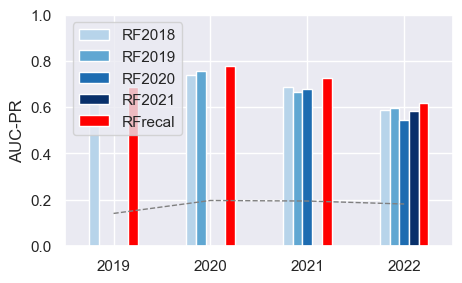

,RF2018,RF2019,RF2020,RF2021,RFrecal
year,,,,,
2019,0.657555,NaN,NaN,NaN,0.689449
2020,0.740621,0.757111,NaN,NaN,0.780490
2021,0.689303,0.666915,0.679090,NaN,0.724453
2022,0.586660,0.595128,0.545222,0.583874,0.618592


In [12]:
models = ['RF2018', 'RF2019', 'RF2020', 'RF2021', 'RFrecal']
colors = [Blues(value) for value in np.linspace(0.3, 1, 4)] + [mcolors.to_rgba('red')]
get_APS_per_model(df, 'year', models, color=colors, figsize=(5, 3), hide_xlabel=True, save=True, legend_loc='upper left')

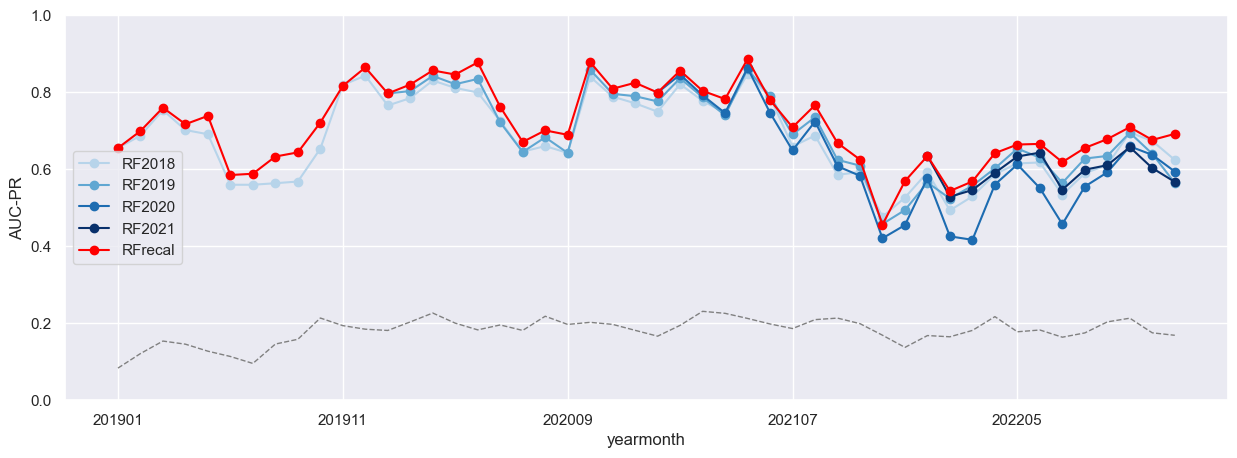

In [13]:
models = ['RF2018', 'RF2019', 'RF2020', 'RF2021', 'RFrecal']
colors = [Blues(value) for value in np.linspace(0.3, 1, 4)] + [mcolors.to_rgba('red')]
aps_df = get_APS_per_model(df, 'yearmonth', models, plot_kind='line', figsize=(15,5), marker='o', color=colors, save=False)

### RF vs others

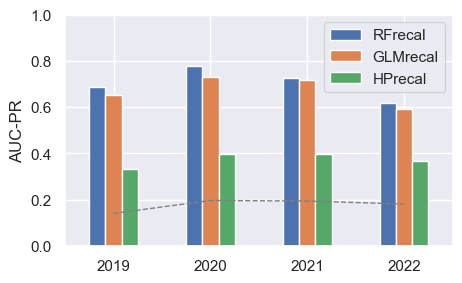

,RFrecal,GLMrecal,HPrecal
year,,,
2019,0.689449,0.651191,0.331505
2020,0.780490,0.732052,0.398002
2021,0.724453,0.718397,0.398232
2022,0.618592,0.591400,0.366759


In [14]:
models = ['RFrecal', 'GLMrecal', 'HPrecal']
get_APS_per_model(df, 'year', models, hide_xlabel=True, figsize=(5,3), save=True)

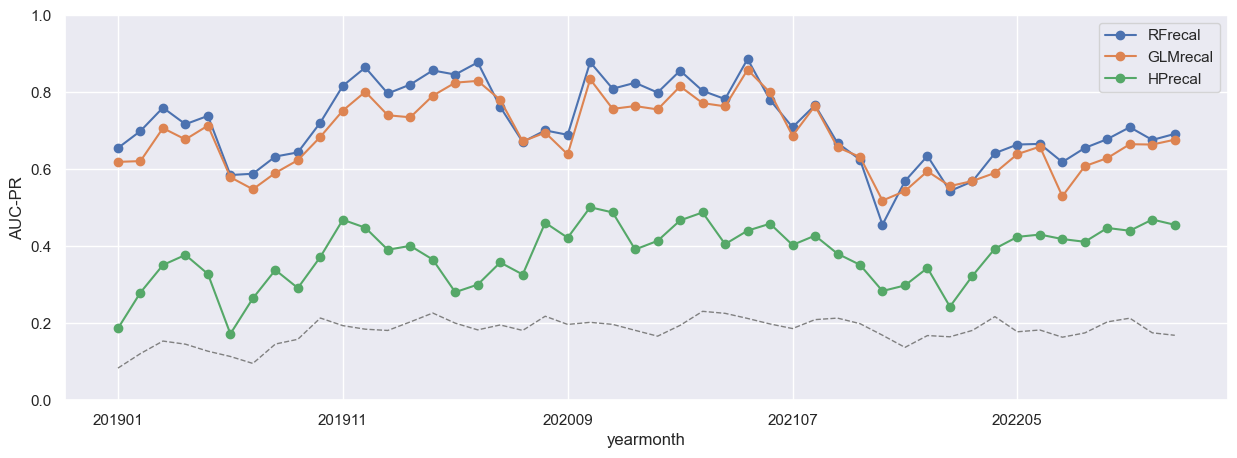

In [15]:
aps_df = get_APS_per_model(df, 'yearmonth', models, plot_kind='line', figsize=(15,5), marker='o', save=False)

<HR>

# TESTS